# Exercise - Analyzing Data Science Job Demand

##  Topics Covered

This exercise goes over:

*   Data cleaning and preparation
*   Data management
*   Extract from datetime
*   Pivot tables
*   Index management

##  Question

In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:

*   General trend of data jobs in demand. We're going to look at it by month.

Load data.

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#   Demand of Data Jobs

1.  First step is we're only going to look at roles in the United States. So we're going to create a copy of our DataFrame and only include roles that are in the United States.

In [58]:
## Skill count per month for data analysts
df_us = df[df['job_country']=='United States'].copy()

2.  Since we're getting the count by month we need to aggregate by month. We can do this by first extracting the month from our job_posted_date column.

In [5]:
# extract the month name from 'job_posted_date'
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


### Exemples des formats

Voici quelques codes de format communs pour strftime :

|Code | Description	| Exemple |
|-----|---------------|---------|
|%Y | Année avec 4 chiffres | 2025 |
|%y | Année avec 2 chiffres | 25 |
|%m | Mois sous forme de nombre (01-12) | 01 |
|%B | Nom complet du mois | January |
|%b | Nom abrégé du mois | Jan |
|%d | Jour du mois (01-31) | 15 |
|%A | Nom complet du jour de la semaine | Monday |
|%a | Nom abrégé du jour de la semaine | Mon |
|%H | Heure (00-23) | 14 |
|%M | Minute | 30 |
|%S | Seconde | 45 |


3.  Next let's pivot by month and job_title_short and get the count.

In [41]:

df_US_pivot = df_us.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)

In [42]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


4.  Let's sort this.

NOTE: See bottom of this notebook for easier way to do this.

In [36]:
df_US_pivot.index.name

'job_posted_month'

In [45]:
# sort job_posted_month_name in df_US_pivot by job_posted_month value
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')


df_US_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [44]:
print(df_US_pivot.index.name)

job_posted_month


5.  Let's now graph this.
Now we could plot all of this

<Axes: xlabel='job_posted_month'>

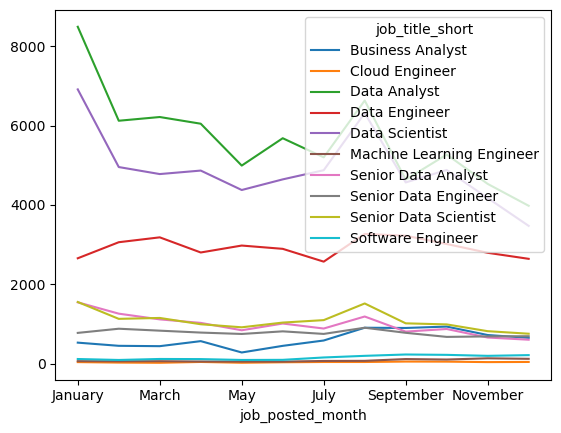

In [46]:
df_US_pivot.plot(kind='line')

Instead we'll just focus on the top 4 roles.

In [50]:
top_4 = df_us['job_title_short'].value_counts().head(4)
top_4 = top_4.index.to_list()
top_4

['Data Analyst', 'Data Scientist', 'Data Engineer', 'Senior Data Scientist']

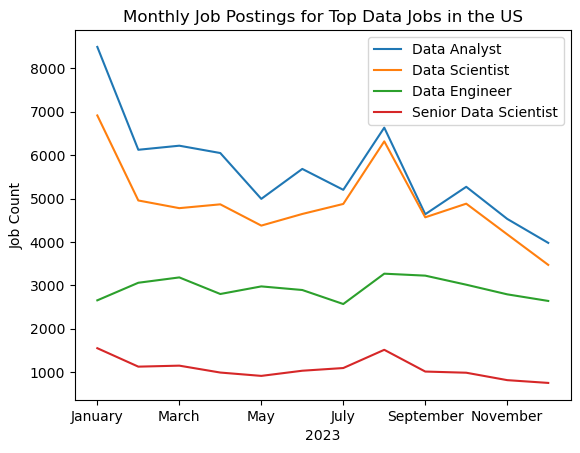

In [57]:
df_US_pivot[top_4].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

### Easier Method to Sort Months

After filming the video portion for this I found there is an easier way to sort the months. using the .to_period('M') method.

In [61]:
# extract the month name from 'job_posted_date'
df_us['job_posted_month'] = df_us['job_posted_date'].dt.to_period('M')

df_us['job_posted_month']

0         2023-06
3         2023-07
5         2023-11
6         2023-03
9         2023-04
           ...   
785673    2023-10
785685    2023-07
785692    2023-04
785703    2023-01
785705    2023-01
Name: job_posted_month, Length: 206292, dtype: period[M]

In [62]:
df_US_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,527,36,8494,2655,6915,60,1544,773,1552,114
2023-02,447,24,6124,3060,4956,56,1258,878,1127,90
2023-03,438,19,6218,3183,4779,59,1114,829,1150,115
2023-04,565,40,6049,2801,4867,51,1025,781,991,112
2023-05,279,20,4993,2976,4377,49,839,746,914,90
2023-06,446,32,5683,2893,4645,48,1009,812,1033,93
2023-07,581,39,5201,2570,4876,65,883,747,1095,153
2023-08,903,39,6634,3269,6318,68,1186,903,1515,194
2023-09,897,50,4639,3224,4568,113,805,775,1014,228


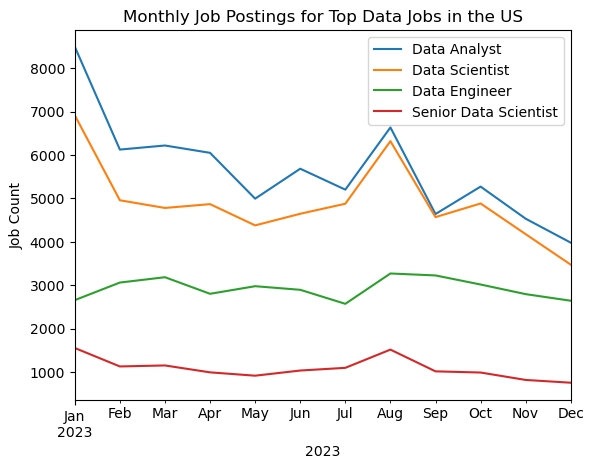

In [65]:
df_US_pivot[top_4].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [6]:
type(df_us['job_posted_date'])

pandas.core.series.Series